In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Train.csv')



In [3]:
data.drop('ID', axis=1, inplace=True)

In [4]:
data.head()

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius,Label
0,114.798900,3790.450939,28.0,0.427078,6.162365,21.220403,58.492773,63.959387,0.621206,0.521813,24.624612,0.0,1001.533430,27.190843,1
1,14.154240,5182.451722,28.0,0.138876,5.399498,0.000000,22.886762,29.508369,0.422183,0.444403,0.044440,0.0,1089.121009,30.150941,0
2,0.044444,120.821253,28.0,0.000000,1.577765,0.000000,11.733239,12.888786,0.177776,0.155554,0.044444,0.0,322.464081,28.163287,0
3,31.369916,127228.251100,31.0,0.523750,15.981107,5.356671,602.125436,6976.986795,3.311801,5.756755,5.623394,0.0,12015.169690,34.204404,0
4,5.046181,1091.620117,25.0,0.069468,1.356022,0.000000,16.138887,13.271234,0.155609,0.133379,0.000000,0.0,550.989619,31.466889,1


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
 data.drop(labels=["Label"], axis=1),
 data["Label"],
 test_size=0.3,
 random_state=0,
)

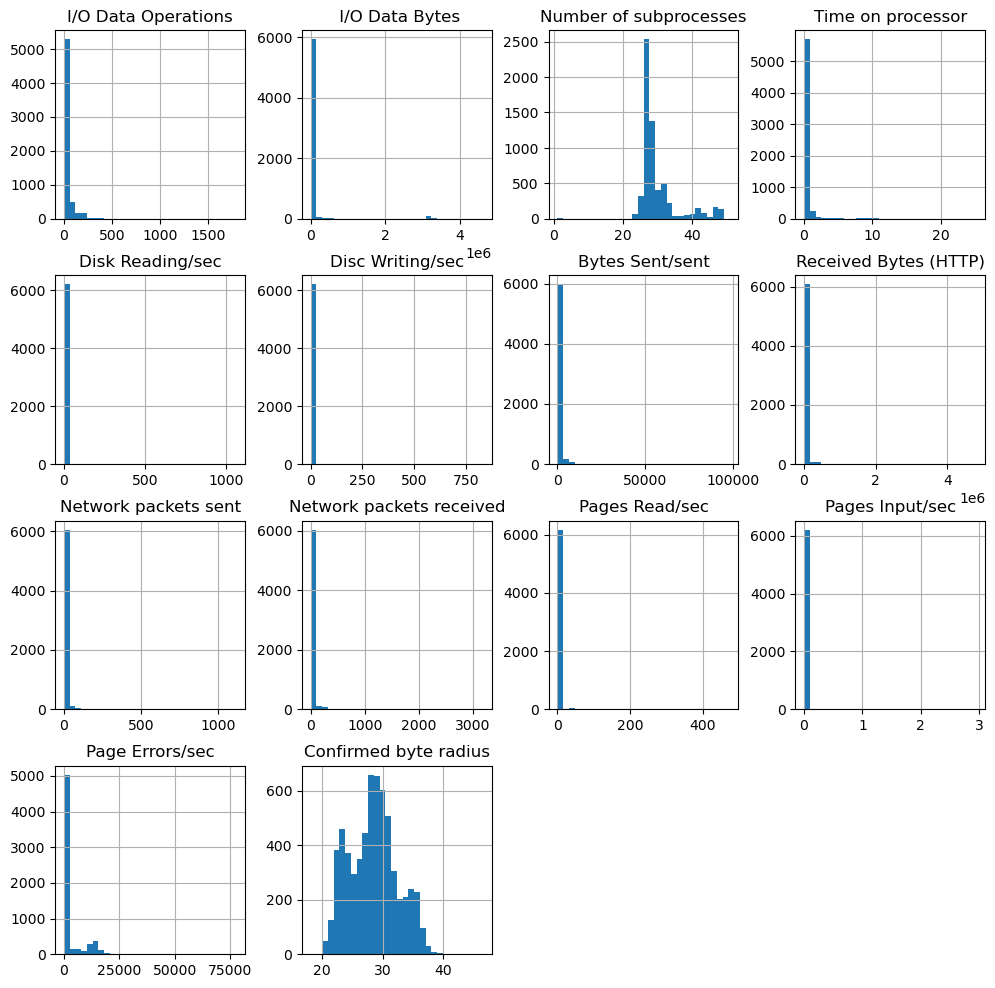

In [6]:
X_train.hist(bins=30, figsize=(12, 12))
plt.show()

In [7]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")
    plt.show()

In [20]:
list(X_train)

['I/O Data Operations',
 ' I/O Data Bytes',
 'Number of subprocesses',
 'Time on processor',
 'Disk Reading/sec',
 'Disc Writing/sec',
 'Bytes Sent/sent',
 'Received Bytes (HTTP)',
 'Network packets sent',
 'Network packets received',
 'Pages Read/sec',
 'Pages Input/sec',
 'Page Errors/sec',
 'Confirmed byte radius']

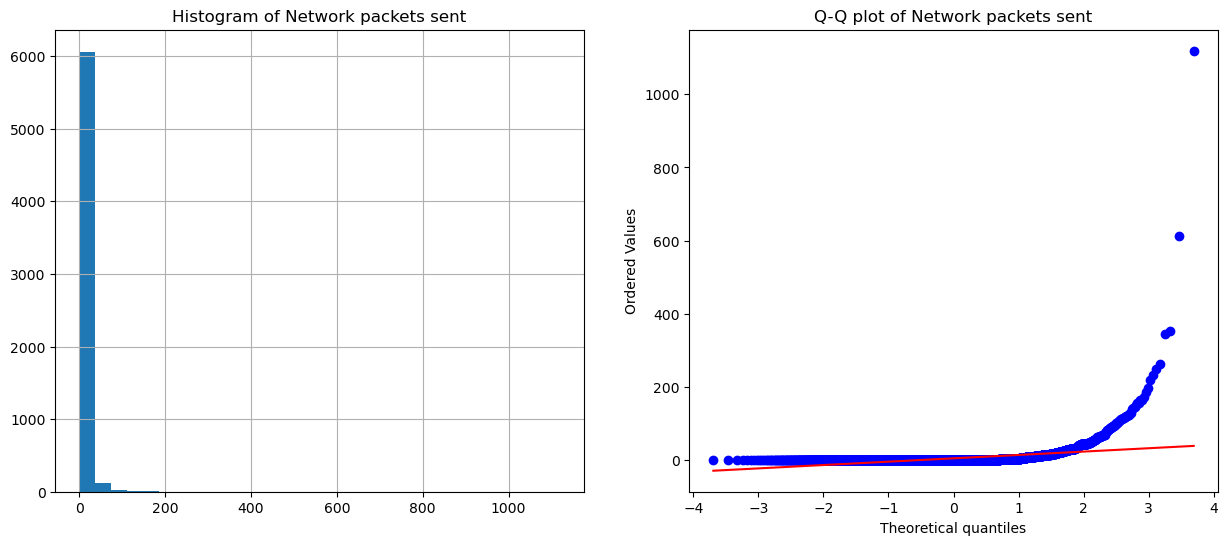

In [8]:
diagnostic_plots(X_train, "Network packets sent")

In [10]:
X_train_copy = X_train.copy()

In [11]:
X_train_copy = np.log(X_train_copy + 1)

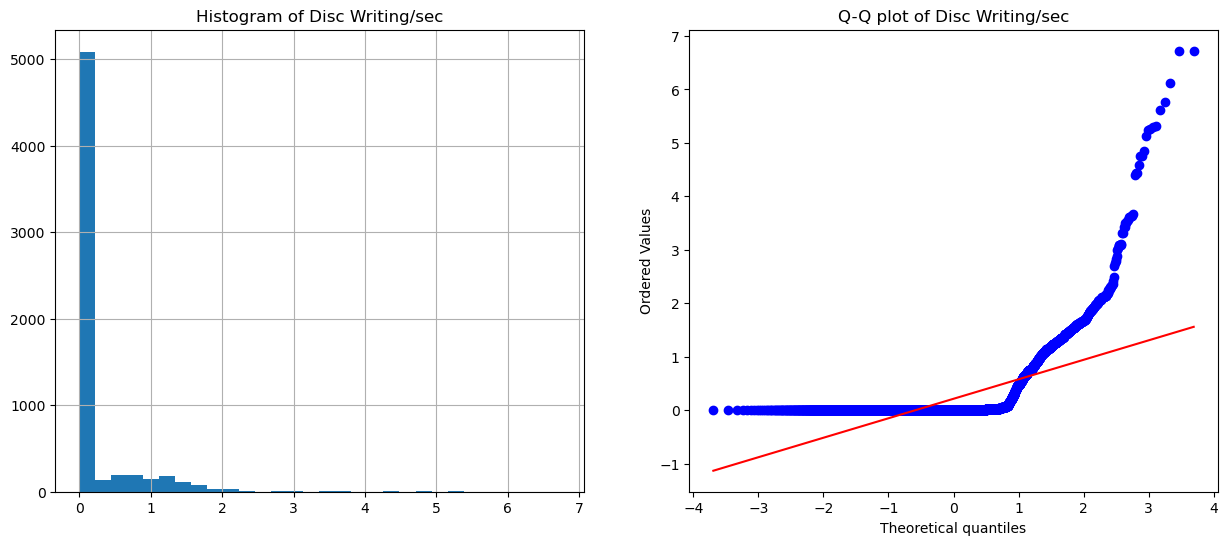

In [13]:
diagnostic_plots(X_train_copy, "Disc Writing/sec")

In [14]:
from sklearn.preprocessing import FunctionTransformer

In [15]:
transformer = FunctionTransformer(np.log, inverse_func=np.exp)

In [16]:
X_tf  = transformer.transform(X_train)

c:\Users\Sajid\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [17]:
X_tf 

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
4349,3.662983,9.086269,3.295837,-1.568625,0.163621,-inf,4.396633,4.844528,-0.405474,-0.671177,-inf,-inf,7.004893,3.213551
130,2.419879,7.903281,3.295837,-1.568610,-0.715615,-inf,2.583583,2.697630,-1.609433,-1.727216,-inf,-inf,6.378356,3.589491
302,1.626214,7.009105,3.178054,-3.361211,0.252935,-inf,3.920907,3.707836,-0.440212,-0.629454,-inf,-inf,6.622659,3.286206
5773,4.270485,13.916699,3.465736,1.160789,2.165335,-1.839397,5.661369,8.141732,0.571401,1.277288,-1.387412,-inf,8.329833,3.398367
4216,3.303225,9.705420,3.258097,-inf,0.470012,-inf,4.345256,4.406457,-0.117775,-0.093082,-inf,-inf,6.209537,3.523375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,2.383386,8.228497,3.295837,-3.360645,0.043218,-inf,6.528146,6.452273,0.938003,0.808191,-3.806929,-inf,6.010401,3.176336
7891,3.717955,10.522101,3.332205,-1.162896,-0.439311,-inf,4.695879,4.916137,-0.251258,-0.715564,-inf,-inf,6.510182,3.116498
4859,2.418247,8.311847,3.332205,-3.360024,0.537494,-inf,6.475030,6.276368,0.704548,0.726288,-3.806312,-inf,6.567929,3.177332
3264,4.721388,8.128712,3.218876,-1.163235,0.218606,-1.167688,4.744269,5.466758,-0.310238,-0.310238,-3.113598,-inf,6.387582,3.158560


### Transforming variables with the reciprocal function

In [18]:
X_train["Network packets sent"] = np.reciprocal(X_train["Network packets sent"])

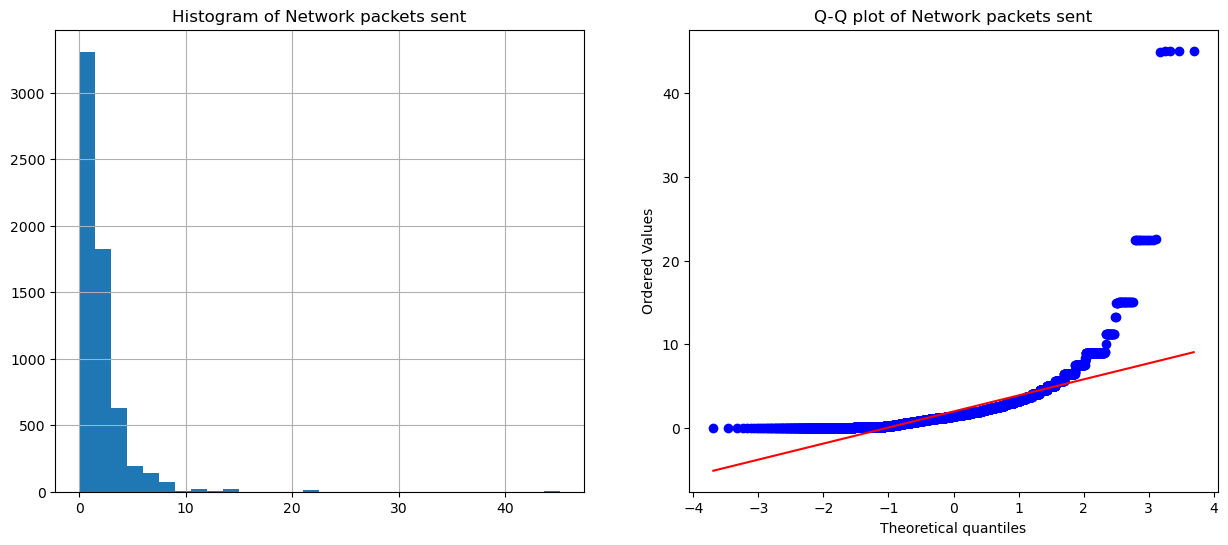

In [19]:
diagnostic_plots(X_train, "Network packets sent")

In [44]:
tr_train = X_train.copy()

In [45]:
tr_train = np.reciprocal(tr_train)

c:\Users\Sajid\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in reciprocal
  result = func(self.values, **kwargs)


In [46]:
tr_train

,I/O Data Operations,I/O Data Bytes,Number of subprocesses,Time on processor,Disk Reading/sec,Disc Writing/sec,Bytes Sent/sent,Received Bytes (HTTP),Network packets sent,Network packets received,Pages Read/sec,Pages Input/sec,Page Errors/sec,Confirmed byte radius
4349,0.025656,1.132097e-04,0.037037,4.800044,0.849064,inf,0.012319,0.007871,0.666661,1.956539,inf,inf,0.000907,0.040214
130,0.088932,3.695292e-04,0.037037,4.799971,2.045445,inf,0.075503,0.067365,0.200001,5.624973,inf,inf,0.001698,0.027612
302,0.196673,9.036170e-04,0.041667,28.824082,0.776519,inf,0.019823,0.024531,0.643900,1.876587,inf,inf,0.001330,0.037395
5773,0.013975,9.037629e-07,0.031250,0.313239,0.114711,6.292745,0.003478,0.000291,1.770747,0.278792,4.004474,inf,0.000241,0.033428
4216,0.036764,6.095221e-05,0.038462,inf,0.624995,inf,0.012968,0.012198,0.888896,1.097552,inf,inf,0.002010,0.029500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,0.092238,2.669371e-04,0.037037,28.807756,0.957702,inf,0.001462,0.001577,2.554874,0.445663,45.012004,inf,0.002453,0.041738
7891,0.024284,2.693453e-05,0.035714,3.199186,1.551637,inf,0.009133,0.007327,0.777821,2.045340,inf,inf,0.001488,0.044312
4859,0.089078,2.455899e-04,0.035714,28.789871,0.584211,inf,0.001541,0.001880,2.022932,0.483701,44.984215,inf,0.001405,0.041697
3264,0.008903,2.949478e-04,0.040000,3.200269,0.803638,3.214552,0.008701,0.004225,0.733273,1.363749,22.501866,inf,0.001682,0.042487


### Using the square root to transform variables
The square root transformation, √x, as well as its variations, the Anscombe transformation, √(x+3/8),
and the Freeman-Tukey transformation, √x + √(x+1), are variance stabilizing transformations that 
